In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import linear_model
import statsmodels.api as sm


In [2]:
df11 = pd.read_csv('/Users/brucehu/Desktop/Nov.csv')
print(df11)

                                                  name   price  score   dis
0                                      Fairmont Austin  1052.0    8.9   0.4
1             DoubleTree Suites by Hilton Hotel Austin   903.0    7.9   0.7
2                                      The LINE Austin  1324.0    8.2   0.3
3    La Quinta Inn by Wyndham Austin Capitol / Down...   682.0    5.8   0.4
4          DoubleTree by Hilton Austin-University Area   915.0    8.0   1.1
..                                                 ...     ...    ...   ...
186    Courtyard Austin by Marriott Northwest/Lakeline   679.0    8.7  14.2
187  Super 8 by Wyndham Austin University/Downtown ...   485.0    6.0   3.9
188  Holiday Inn Express Hotel & Suites Austin Airp...   828.0    8.0   4.6
189                              Austin Marriott South  1003.0    8.2   3.9
190                                    Brava House B&B  1755.0    9.5   1.0

[191 rows x 4 columns]


In [3]:
df_low=df11[df11['price']<1000]
X = df_low[['dis','score']].values.reshape(-1,2)
Y = df_low['price']

x = X[:, 0]
y = X[:, 1]
z = Y

In [4]:
x_pred = np.linspace(6, 24, 30)   # range of dis
y_pred = np.linspace(0, 10, 30)  # range of score
xx_pred, yy_pred = np.meshgrid(x_pred, y_pred)
model_viz = np.array([xx_pred.flatten(), yy_pred.flatten()]).T

In [5]:
ols = linear_model.LinearRegression()
model = ols.fit(X, Y)
predicted = model.predict(model_viz)

In [6]:
r2 = model.score(X, Y)

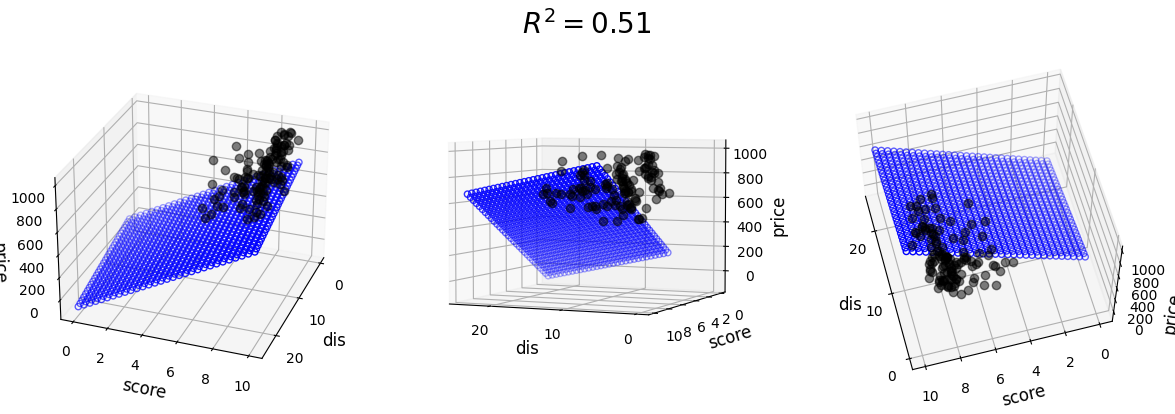

In [7]:
plt.style.use('default')

fig = plt.figure(figsize=(12, 4))

ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')

axes = [ax1, ax2, ax3]

for ax in axes:
    ax.plot(x, y, z, color='k', zorder=15, linestyle='none', marker='o', alpha=0.5)
    ax.scatter(xx_pred.flatten(), yy_pred.flatten(), predicted, facecolor=(0,0,0,0), 
               s=20, edgecolor='blue')
    ax.set_xlabel('dis', fontsize=12)
    ax.set_ylabel('score', fontsize=12)
    ax.set_zlabel('price', fontsize=12)
    ax.locator_params(nbins=4, axis='x')
    ax.locator_params(nbins=5, axis='x')
    
ax1.text2D(0.2, 0.32, '', fontsize=13, ha='center', va='center',
           transform=ax1.transAxes, color='grey', alpha=0.5)
ax2.text2D(0.3, 1, '', fontsize=13, ha='center', va='center',
           transform=ax2.transAxes, color='grey', alpha=0.5)
ax3.text2D(0.85, 0.85, '', fontsize=13, ha='center', va='center',
           transform=ax3.transAxes, color='grey', alpha=0.5)

ax1.view_init(elev=28, azim=20)
ax2.view_init(elev=4, azim=114)
ax3.view_init(elev=60, azim=165)

fig.suptitle('$R^2 = %.2f$' % r2, fontsize=20)

fig.tight_layout()